In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import constants
sns.set_context(constants.sns_context)
sns.set_style(constants.sns_style)
completeness_dir = "/home/cadel/projects/thesis/UNSWThesis/data/completeness"
synteny_dir = "/home/cadel/projects/thesis/UNSWThesis/data/synteny"

# Metadata

In [2]:
assemblies = constants.assemblies
excluded = constants.excluded

metadata = pd.read_csv(os.path.join(synteny_dir, "..", "completeness", "assemblies.tsv"), delimiter="\t", names=["Iteration", "Organism", "Genome", "Stage", "Tools"])
metadata.Genome = metadata.Genome.map(lambda x: x.replace('.fasta', ''))
metadata = metadata[~(metadata.Genome.isin(excluded))]

metadata[metadata.Organism == "tigersnake"]

,Iteration,Organism,Genome,Stage,Tools
29,1,tigersnake,tigersnake.v2.0,Assembly,Redbean
30,2,tigersnake,tigersnake.v2.1,Polishing,Medaka
31,3,tigersnake,tigersnake.v2.2,Polishing,Pilon
32,4,tigersnake,tigersnake.v2.3,Tidying,Vecscreen
33,5,tigersnake,tigersnake.v2.4,Scaffolding,ARCS
34,6,tigersnake,tigersnake.v2.5a.sspace,Scaffolding,SSPACE
35,7,tigersnake,tigersnake.v2.5.HiC,Scaffolding,3d-dna
36,8,tigersnake,tigersnake.v2.6.gapfinisher,Gapfilling,Gapfinisher
37,9,tigersnake,tigersnake.v2.7.pafscaff,Mapping,PAFScaff
38,10,tigersnake,tigersnake.v2.8,Gapfilling,Gapspanner


# DedUCE measurements

In [3]:
from functools import reduce

dfs = []
for assembly in assemblies:
    b = pd.read_csv(os.path.join(synteny_dir, assembly, f"deduce_blocks.csv"))
    b = b[~(b.assembly.isin(excluded))]
    b["assembly"] = b["assembly"].map(lambda x: x.replace(".fasta", ""))
    dfs.append(b)

deduce_blocks = reduce(lambda x, acc: pd.concat([x,acc]), dfs)
deduce_blocks

,iteration,assembly,n_paths,avg_len,median_len,min_len,max_len,avg_score,median_score,min_score,max_score
0,0,canetoad.v2.2,319,3.413793,3.0,1,19,16.291536,11.0,-3,126
1,1,canetoad.v3.0.flye,327,3.681957,3.0,1,30,18.418960,10.0,-3,203
2,2,canetoad.v3.1.tidy,319,3.796238,3.0,1,30,18.899687,12.0,-3,203
3,3,canetoad.v3.2.hypo,324,3.709877,3.0,1,30,18.459877,11.5,-3,203
4,4,canetoad.v3.3.arcs,307,4.117264,3.0,1,34,20.635179,11.0,-3,231
...,...,...,...,...,...,...,...,...,...,...,...
3,3,step4_scaffolds_gapfilled_FINAL,328,43.981707,9.0,2,482,295.707317,56.0,4,3290
4,4,step5_L_RNA_scaffolder,320,44.762500,8.5,1,482,300.071875,56.0,-3,3292
5,5,step6_L_RNA_scaffolder.polished,324,44.438272,8.0,1,482,297.533951,55.0,-3,3291
6,6,step7_L_RNA_scaffolder.polished.tidy.diploidocus,317,45.842271,9.0,2,482,304.558360,58.0,4,3291


In [4]:
deduce_dfs = []
for assembly in assemblies:
    d = pd.read_csv(os.path.join(completeness_dir, assembly, "completeness", "deduce_comp.csv"))
    d = d.drop(columns=["mm_mean", "mm_median", "mm_sd", "mm_min", "mm_max", "mm_iqr", "score_mean", "score_median", "score_sd", "score_min", "score_max", "score_iqr"])
    d.alignment = d.alignment.map(lambda x: x.replace('.fasta', ''))
    d = d[~(d.alignment.isin(excluded))]

    deduce_dfs.append(d)

deduce_comp = reduce(lambda x, acc: pd.concat([x,acc]), deduce_dfs)
deduce_comp

,alignment,hit,exact_hit,miss
0,canetoad.v2.2,62061,13384,34032
1,canetoad.v3.0.flye,62635,13968,33458
2,canetoad.v3.1.tidy,62627,13930,33466
3,canetoad.v3.2.hypo,62983,14042,33110
4,canetoad.v3.3.arcs,62982,14048,33111
...,...,...,...,...
3,step4_scaffolds_gapfilled_FINAL,95973,68413,5949
4,step5_L_RNA_scaffolder,95973,68413,5949
5,step6_L_RNA_scaffolder.polished,96004,68465,5918
6,step7_L_RNA_scaffolder.polished.tidy.diploidocus,96002,68484,5920


In [5]:
full_dfs = []
for assembly in assemblies:
    b = pd.read_csv(os.path.join(synteny_dir, assembly, f"deduce_pairs_10_full.csv"))
    b = b[~(b.assembly.isin(excluded))]
    b["assembly"] = b["assembly"].map(lambda x: x.replace(".fasta", ""))
    full_dfs.append(b)

deduce_pairs = reduce(lambda x, acc: pd.concat([x,acc]), full_dfs)
deduce_pairs

,assembly,total,valid,score,average_consensus,unique_uces,nonunique_uces
0,canetoad.v2.2,136,87,46.658442,1.287356,409,0
1,canetoad.v3.0.flye,159,117,62.984163,1.358974,417,0
2,canetoad.v3.1.tidy,161,118,63.184163,1.355932,417,0
3,canetoad.v3.2.hypo,175,125,66.623052,1.352000,431,0
4,canetoad.v3.3.arcs,212,150,75.908009,1.353333,432,0
...,...,...,...,...,...,...,...
3,step4_scaffolds_gapfilled_FINAL,12779,11871,8798.211833,1.673069,13166,0
4,step5_L_RNA_scaffolder,12793,11812,8676.728499,1.659245,13165,0
5,step6_L_RNA_scaffolder.polished,12803,11817,8681.703499,1.658966,13174,0
6,step7_L_RNA_scaffolder.polished.tidy.diploidocus,12817,11836,8711.323737,1.660358,13172,0


In [6]:
assembly_data = pd.merge(metadata, deduce_comp, how="outer", left_on="Genome", right_on="alignment", suffixes=("", "_comp"))
assembly_data = pd.merge(assembly_data, deduce_pairs, how="outer", left_on="Genome", right_on="assembly",suffixes=("", "_pairs"))
assembly_data = pd.merge(assembly_data, deduce_blocks, how="outer", left_on="Genome", right_on="assembly",suffixes=("", "_blocks"))

assembly_data = assembly_data[~assembly_data.Iteration.isna() & ~assembly_data.hit.isna() & ~assembly_data.valid.isna() & ~assembly_data.avg_score.isna()]
#assembly_data[assembly_data.valid.isna()]
assembly_data

,Iteration,Organism,Genome,Stage,Tools,alignment,hit,exact_hit,miss,assembly,...,assembly_blocks,n_paths,avg_len,median_len,min_len,max_len,avg_score,median_score,min_score,max_score
0,1.0,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova,step1_svulgaris-10x-550M-sub80.1,95920.0,68393.0,6002.0,step1_svulgaris-10x-550M-sub80.1,...,step1_svulgaris-10x-550M-sub80.1,805.0,20.436025,6.0,1.0,341.0,137.290683,41.0,-3.0,2333.0
1,2.0,starling,step2_svulgaris-10x-550M-sub80.pri,Tidying,Diploidocus,step2_svulgaris-10x-550M-sub80.pri,95920.0,68392.0,6002.0,step2_svulgaris-10x-550M-sub80.pri,...,step2_svulgaris-10x-550M-sub80.pri,807.0,20.376704,6.0,1.0,341.0,136.858736,39.0,-3.0,2333.0
2,3.0,starling,step3_scaffolds,Scaffolding,"SLR, SSPACE",step3_scaffolds,95920.0,68396.0,6002.0,step3_scaffolds,...,step3_scaffolds,329.0,43.775076,9.0,1.0,482.0,291.729483,56.0,-3.0,3291.0
3,4.0,starling,step4_scaffolds_gapfilled_FINAL,Gapfilling,"LR_GapCloser, GapFinisher",step4_scaffolds_gapfilled_FINAL,95973.0,68413.0,5949.0,step4_scaffolds_gapfilled_FINAL,...,step4_scaffolds_gapfilled_FINAL,328.0,43.981707,9.0,2.0,482.0,295.707317,56.0,4.0,3290.0
4,5.0,starling,step5_L_RNA_scaffolder,Scaffolding,L_RNA_Scaffolder,step5_L_RNA_scaffolder,95973.0,68413.0,5949.0,step5_L_RNA_scaffolder,...,step5_L_RNA_scaffolder,320.0,44.762500,8.5,1.0,482.0,300.071875,56.0,-3.0,3292.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,35.0,tigersnake,tigersnake.v2.19c.gapspanner.gapfill,Gapfilling,Gapspanner,tigersnake.v2.19c.gapspanner.gapfill,16428.0,12613.0,456.0,tigersnake.v2.19c.gapspanner.gapfill,...,tigersnake.v2.19c.gapspanner.gapfill,40.0,31.300000,11.0,1.0,200.0,199.825000,66.0,7.0,1251.0
64,36.0,tigersnake,tigersnake.v2.19d.gapspanner,Gapfilling,Gapspanner,tigersnake.v2.19d.gapspanner,16428.0,12622.0,456.0,tigersnake.v2.19d.gapspanner,...,tigersnake.v2.19d.gapspanner,34.0,35.058824,15.0,1.0,200.0,220.294118,96.0,7.0,1251.0
65,37.0,tigersnake,tigersnake.v2.20.hypo3,Polishing,HyPo,tigersnake.v2.20.hypo3,16432.0,12587.0,452.0,tigersnake.v2.20.hypo3,...,tigersnake.v2.20.hypo3,35.0,35.685714,13.0,1.0,200.0,227.000000,91.0,7.0,1277.0
66,38.0,tigersnake,tigersnake.v2.21a.3d-dna,Scaffolding,3D-DNA,tigersnake.v2.21a.3d-dna,16432.0,12586.0,452.0,tigersnake.v2.21a.3d-dna,...,tigersnake.v2.21a.3d-dna,29.0,41.137931,8.0,1.0,228.0,243.965517,56.0,7.0,1446.0


KeyError: "['N50', 'L50'] not in index"

# Normalise and aggregate

In [7]:
stats_data = assembly_data.copy()
# https://stackoverflow.com/a/26046920

# Completeness
stats_data["comp_hit_%"] = stats_data["hit"] / (stats_data["hit"] + stats_data["miss"])
stats_data["comp_exact_%"] = stats_data["exact_hit"] / (stats_data["hit"] + stats_data["miss"])
stats_data["comp_hit_norm"] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["hit"]
stats_data["comp_exact_norm"] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["exact_hit"]
stats_data["comp_hit_diff"] = stats_data.groupby('Organism')["comp_hit_norm"].transform(lambda x: x.diff()) 
stats_data['comp_exact_diff'] = stats_data.groupby('Organism')["comp_exact_norm"].transform(lambda x: x.diff()) 

# Pairs
stats_data["pairs_valid_%"] = stats_data["valid"] / stats_data["total"]
stats_data["pairs_valid_%_norm"] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["pairs_valid_%"]
stats_data['pairs_valid_%_diff'] = stats_data.groupby('Organism')["pairs_valid_%_norm"].transform(lambda x: x.diff()) 

stats_data["pairs_valid_norm"] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["valid"]
stats_data['pairs_valid_diff'] = stats_data.groupby('Organism')["pairs_valid_norm"].transform(lambda x: x.diff()) 
stats_data["pairs_score_norm"] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["score"]
stats_data['pairs_score_diff'] = stats_data.groupby('Organism')["pairs_score_norm"].transform(lambda x: x.diff()) 

# Blocks
stats_data['block_score_norm'] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["avg_score"]
stats_data['block_score_diff'] = stats_data.groupby('Organism')["block_score_norm"].transform(lambda x: x.diff()) 

stats_data['block_len_norm'] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["avg_len"]
stats_data['block_len_diff'] = stats_data.groupby('Organism')["block_len_norm"].transform(lambda x: x.diff()) 


/tmp/ipykernel_6770/1582500222.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  stats_data["comp_hit_norm"] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["hit"]
/tmp/ipykernel_6770/1582500222.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  stats_data["comp_exact_norm"] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["exact_hit"]
/tmp/ipykernel_6770/1582500222.py:14: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns

# Distribution by stage

In [8]:
excluded_stages = ["Reduction", "Assembly","Initial assembly"]
stage_data = stats_data[~stats_data.Stage.isin(["Reduction", "Assembly","Initial assembly", "Tidying", "Fixing", "Mapping"])]

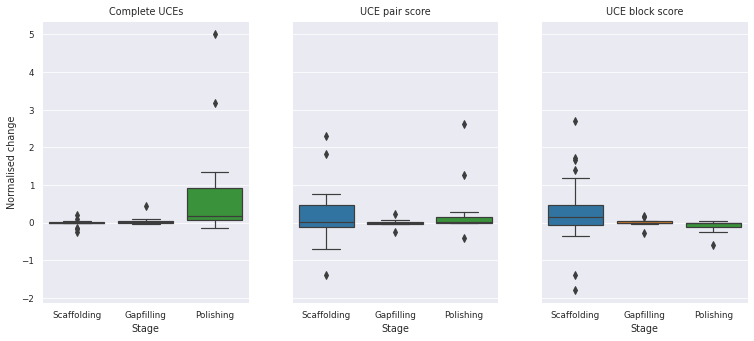

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(11, 5),sharey=True)
fig.tight_layout(pad=3.0)

sns.boxplot(ax=ax1, data=stage_data,x="Stage",y="comp_exact_diff")
sns.boxplot(ax=ax2, data=stage_data,x="Stage",y="pairs_score_diff")
sns.boxplot(ax=ax3, data=stage_data,x="Stage",y="block_score_diff")

ax1.set_title("Complete UCEs")
ax2.set_title("UCE pair score")
ax3.set_title("UCE block score")

ax1.set_ylabel("Normalised change")
ax2.set_ylabel("")
ax3.set_ylabel("")
fig.savefig(os.path.join(constants.image_out_dir, "effect_of_assembly_stage.pdf"))

<AxesSubplot:xlabel='Stage', ylabel='pairs_valid_diff'>

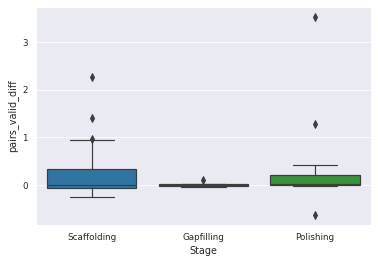

In [10]:
sns.boxplot(data=stage_data,x="Stage",y="pairs_valid_diff")

<AxesSubplot:xlabel='Stage', ylabel='block_score_diff'>

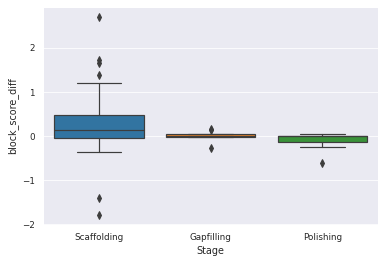

In [11]:
sns.boxplot(data=stage_data,x="Stage",y="block_score_diff")

<AxesSubplot:xlabel='Stage', ylabel='comp_hit_diff'>

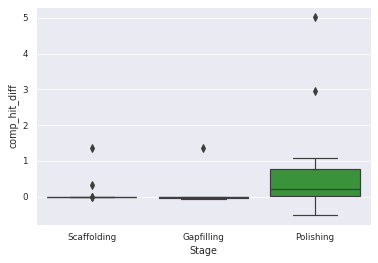

In [12]:
sns.boxplot(data=stage_data,x="Stage",y="comp_hit_diff")

<AxesSubplot:xlabel='Stage', ylabel='comp_exact_diff'>

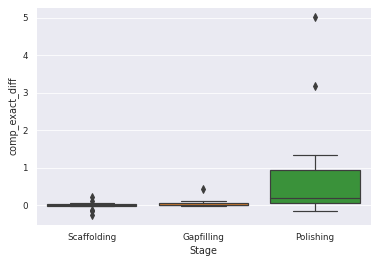

In [13]:
sns.boxplot(data=stage_data,x="Stage",y="comp_exact_diff")

## Test some hypotheses

In [19]:
import scipy.stats as ss

# Completeness
print("EXACT HIT: improved by polishing")
print(ss.ttest_1samp(stage_data[stage_data.Stage == "Polishing"]["comp_exact_diff"], 0, alternative='greater'))
print("EXACT HIT: improved by scaffolding")
print(ss.ttest_1samp(stage_data[stage_data.Stage == "Scaffolding"]["comp_exact_diff"], 0, alternative='greater'))

print("HIT: improved by polishing")
print(ss.ttest_1samp(stage_data[stage_data.Stage == "Polishing"]["comp_hit_diff"], 0, alternative='greater'))

print("EXACT HIT: improved by polishing more than HIT")
print(ss.ttest_ind(
    stage_data[stage_data.Stage == "Polishing"]["comp_exact_diff"],
    stage_data[stage_data.Stage == "Polishing"]["comp_hit_diff"],
    alternative='greater'))

# Pairs
print("VALID %: improved by scaffolding")
print(ss.ttest_1samp(stage_data[stage_data.Stage == "Scaffolding"]["pairs_valid_%_diff"], 0, alternative='greater'))

print("VALID %: improved by polishing")
print(ss.ttest_1samp(stage_data[stage_data.Stage == "Polishing"]["pairs_valid_%_diff"], 0, alternative='greater'))

print("VALID NUMBER: improved by scaffolding")
print(ss.ttest_1samp(stage_data[stage_data.Stage == "Scaffolding"]["pairs_valid_diff"], 0, alternative='greater'))

print("VALID NUMBER: not improved by polishing")
print(ss.ttest_1samp(stage_data[stage_data.Stage == "Polishing"]["pairs_valid_diff"], 0, alternative='greater'))

print("VALID SCORE: improved by scaffolding")
print(ss.ttest_1samp(stage_data[stage_data.Stage == "Scaffolding"]["pairs_score_diff"], 0, alternative='greater'))

print("VALID SCORE: not improved by polishing")
print(ss.ttest_1samp(stage_data[stage_data.Stage == "Polishing"]["pairs_score_diff"], 0, alternative='greater'))

# Blocks
print("BLOCK SCORE: improved by scaffolding")
print(ss.ttest_1samp(stage_data[stage_data.Stage == "Scaffolding"]["block_score_diff"], 0, alternative='greater'))

print("BLOCK SCORE: not improved by polishing")
print(ss.ttest_1samp(stage_data[stage_data.Stage == "Polishing"]["block_score_diff"], 0, alternative='greater'))

print("BLOCK SCORE: improved by scaffolding more than polishing")
print(ss.ttest_ind(
    stage_data[stage_data.Stage == "Scaffolding"]["block_score_diff"],
    stage_data[stage_data.Stage == "Polishing"]["block_score_diff"],
    alternative='greater'))

EXACT HIT: improved by polishing
Ttest_1sampResult(statistic=2.1349229000569685, pvalue=0.02618874369779276)
EXACT HIT: improved by scaffolding
Ttest_1sampResult(statistic=-0.3228639629615589, pvalue=0.6253097595492623)
HIT: improved by polishing
Ttest_1sampResult(statistic=1.9678444949685436, pvalue=0.035396241811926965)
EXACT HIT: improved by polishing more than HIT
Ttest_indResult(statistic=0.1308160316148418, pvalue=0.4484638914424279)
VALID %: improved by scaffolding
Ttest_1sampResult(statistic=-0.4117410845559114, pvalue=0.6580480455150957)
VALID %: improved by polishing
Ttest_1sampResult(statistic=0.4568321118336197, pvalue=0.32766572964452656)
VALID NUMBER: improved by scaffolding
Ttest_1sampResult(statistic=2.261373915896446, pvalue=0.016165293768469993)
VALID NUMBER: not improved by polishing
Ttest_1sampResult(statistic=1.3154932198546736, pvalue=0.1055367480585552)
VALID SCORE: improved by scaffolding
Ttest_1sampResult(statistic=1.4792065584556418, pvalue=0.0755500359294021)

# Correlations

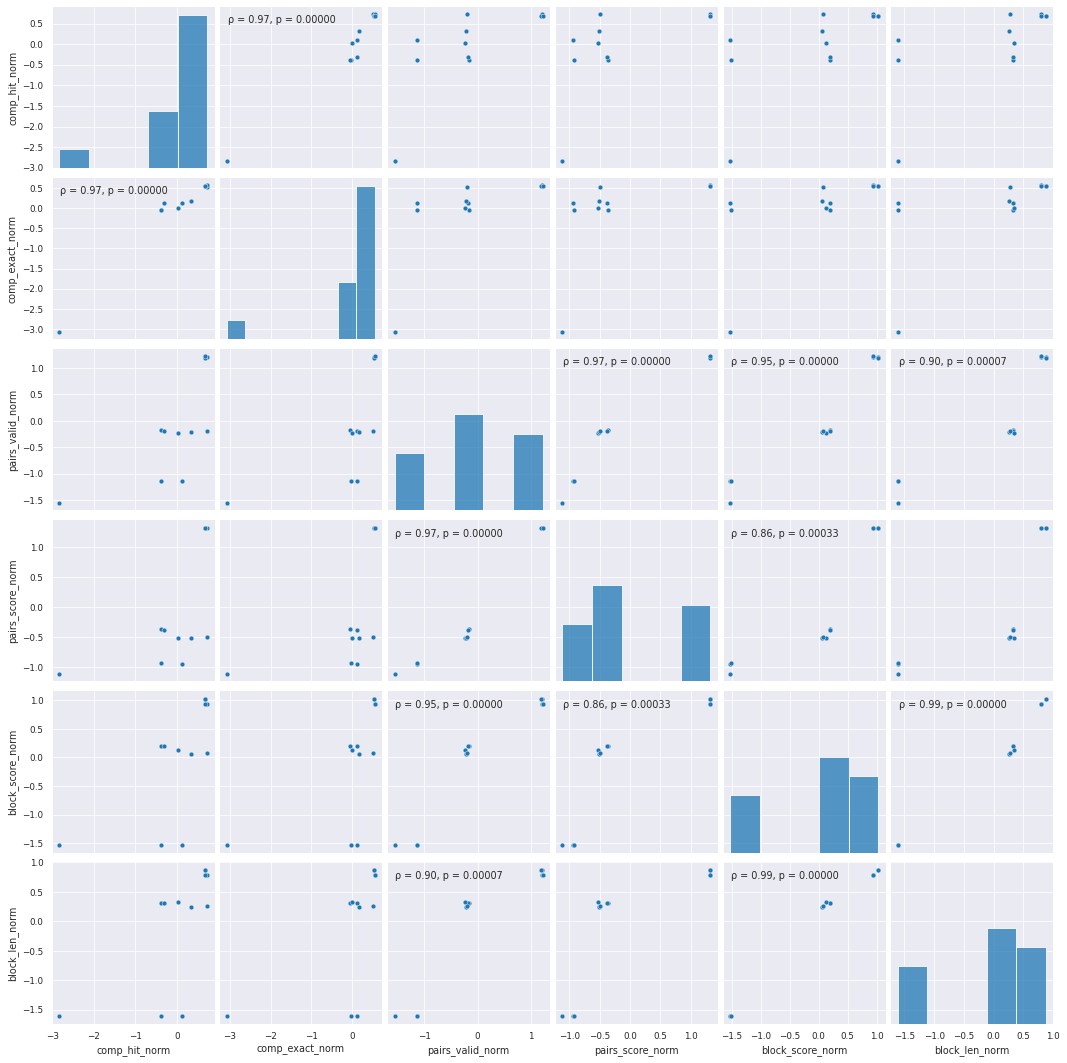

In [15]:
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    n=len(x)
    r, p = pearsonr(x, y)
    ax = ax or plt.gca()

    
    if p < 0.001 and abs(r) >= 0.7 and not x.equals(y):
        #pass
        ax.annotate(f'ρ = {r:.2f}, p = {p:.5f}', xy=(.05, .9), xycoords=ax.transAxes)

        #kws['color'] = 'tomato'

        #plt.scatter(x,y,**kws)

corr_vars = ["comp_hit_norm", "comp_exact_norm", "pairs_valid_norm", "pairs_score_norm", "block_score_norm", "block_len_norm"]

in_g = sns.pairplot(data=stats_data[stats_data.Organism == "sandy"], y_vars=corr_vars, x_vars=corr_vars)
in_g.map(corrfunc)

sandy block_score_norm pairs_score_norm 0.8602337321351293
sandy comp_exact_norm pairs_score_norm 0.5347252641085318
sandy block_score_norm comp_exact_norm 0.6213112427173817
starling block_score_norm pairs_score_norm -0.17711329290858768
starling comp_exact_norm pairs_score_norm 0.24120998955613782
starling block_score_norm comp_exact_norm 0.536476282657262


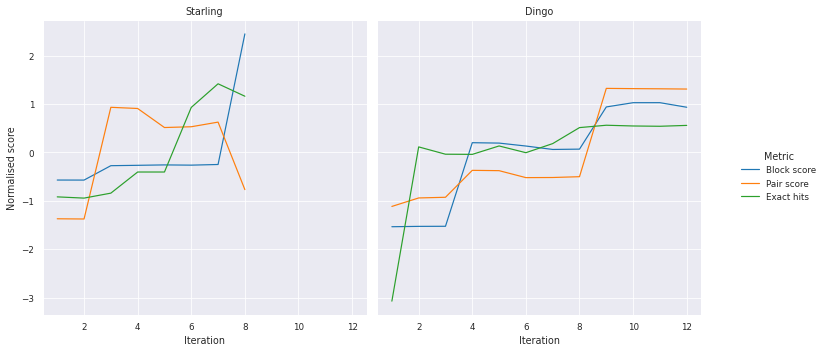

In [16]:
import itertools

f = sns.relplot(data=stats_data[stats_data.Organism.isin(["sandy", "starling"])][["Iteration", "Organism", "block_score_norm", "pairs_score_norm", "comp_exact_norm"]].melt(id_vars=["Iteration", "Organism"]), x="Iteration", y="value", hue="variable", col="Organism", kind="line")
f.axes[0][0].set_title("Starling")
f.axes[0][0].set_ylabel("Normalised score")
f.axes[0][1].set_title("Dingo")

f._legend.set_title("Metric")
f._legend.texts[0].set_text("Block score")
f._legend.texts[1].set_text("Pair score")
f._legend.texts[2].set_text("Exact hits")

f.savefig(os.path.join(constants.image_out_dir, "comparison_of_uce_metrics.pdf"))

for a, (m1,m2) in itertools.product(["sandy", "starling"], [["block_score_norm", "pairs_score_norm"],["comp_exact_norm", "pairs_score_norm"],["block_score_norm", "comp_exact_norm"]]):
    
    print(a, m1, m2, stats_data[stats_data.Organism == a][m1].corr(stats_data[stats_data.Organism == a][m2]))

<AxesSubplot:>

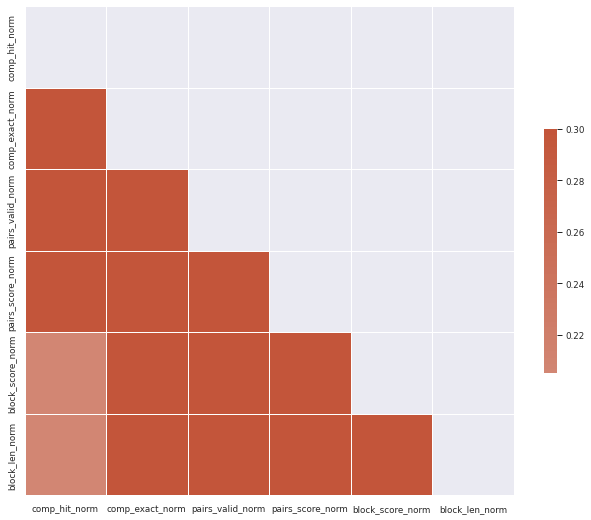

In [17]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = stats_data[["comp_hit_norm", "comp_exact_norm", "pairs_valid_norm", "pairs_score_norm", "block_score_norm", "block_len_norm"]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Comparison to Merqury and SAAGA

In [20]:
assembly_data

,Iteration,Organism,Genome,Stage,Tools,alignment,hit,exact_hit,miss,assembly,...,assembly_blocks,n_paths,avg_len,median_len,min_len,max_len,avg_score,median_score,min_score,max_score
0,1.0,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova,step1_svulgaris-10x-550M-sub80.1,95920.0,68393.0,6002.0,step1_svulgaris-10x-550M-sub80.1,...,step1_svulgaris-10x-550M-sub80.1,805.0,20.436025,6.0,1.0,341.0,137.290683,41.0,-3.0,2333.0
1,2.0,starling,step2_svulgaris-10x-550M-sub80.pri,Tidying,Diploidocus,step2_svulgaris-10x-550M-sub80.pri,95920.0,68392.0,6002.0,step2_svulgaris-10x-550M-sub80.pri,...,step2_svulgaris-10x-550M-sub80.pri,807.0,20.376704,6.0,1.0,341.0,136.858736,39.0,-3.0,2333.0
2,3.0,starling,step3_scaffolds,Scaffolding,"SLR, SSPACE",step3_scaffolds,95920.0,68396.0,6002.0,step3_scaffolds,...,step3_scaffolds,329.0,43.775076,9.0,1.0,482.0,291.729483,56.0,-3.0,3291.0
3,4.0,starling,step4_scaffolds_gapfilled_FINAL,Gapfilling,"LR_GapCloser, GapFinisher",step4_scaffolds_gapfilled_FINAL,95973.0,68413.0,5949.0,step4_scaffolds_gapfilled_FINAL,...,step4_scaffolds_gapfilled_FINAL,328.0,43.981707,9.0,2.0,482.0,295.707317,56.0,4.0,3290.0
4,5.0,starling,step5_L_RNA_scaffolder,Scaffolding,L_RNA_Scaffolder,step5_L_RNA_scaffolder,95973.0,68413.0,5949.0,step5_L_RNA_scaffolder,...,step5_L_RNA_scaffolder,320.0,44.762500,8.5,1.0,482.0,300.071875,56.0,-3.0,3292.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,35.0,tigersnake,tigersnake.v2.19c.gapspanner.gapfill,Gapfilling,Gapspanner,tigersnake.v2.19c.gapspanner.gapfill,16428.0,12613.0,456.0,tigersnake.v2.19c.gapspanner.gapfill,...,tigersnake.v2.19c.gapspanner.gapfill,40.0,31.300000,11.0,1.0,200.0,199.825000,66.0,7.0,1251.0
64,36.0,tigersnake,tigersnake.v2.19d.gapspanner,Gapfilling,Gapspanner,tigersnake.v2.19d.gapspanner,16428.0,12622.0,456.0,tigersnake.v2.19d.gapspanner,...,tigersnake.v2.19d.gapspanner,34.0,35.058824,15.0,1.0,200.0,220.294118,96.0,7.0,1251.0
65,37.0,tigersnake,tigersnake.v2.20.hypo3,Polishing,HyPo,tigersnake.v2.20.hypo3,16432.0,12587.0,452.0,tigersnake.v2.20.hypo3,...,tigersnake.v2.20.hypo3,35.0,35.685714,13.0,1.0,200.0,227.000000,91.0,7.0,1277.0
66,38.0,tigersnake,tigersnake.v2.21a.3d-dna,Scaffolding,3D-DNA,tigersnake.v2.21a.3d-dna,16432.0,12586.0,452.0,tigersnake.v2.21a.3d-dna,...,tigersnake.v2.21a.3d-dna,29.0,41.137931,8.0,1.0,228.0,243.965517,56.0,7.0,1446.0


(0.9030454726898238, 1.6656195653187418e-06)
(0.9985465313126467, 9.968265519882368e-22)
18


,Iteration,Organism,Genome,Stage,Tools,alignment,hit,exact_hit,miss,assembly,...,max_len,avg_score,median_score,min_score,max_score,?,found,expected,completeness,complete_%
0,1.0,tigersnake,tigersnake.v2.0,Assembly,Redbean,tigersnake.v2.0,15725.0,7753.0,1159.0,tigersnake.v2.0,...,117.0,89.000000,38.0,7.0,798.0,all,7.703223e+08,1.217019e+09,63.2958,45.919213
1,2.0,tigersnake,tigersnake.v2.1,Polishing,Medaka,tigersnake.v2.1,16382.0,11691.0,502.0,tigersnake.v2.1,...,99.0,66.597122,35.0,4.0,684.0,all,9.953781e+08,1.217019e+09,81.7882,69.243070
2,3.0,tigersnake,tigersnake.v2.2,Polishing,Pilon,tigersnake.v2.2,16467.0,12533.0,417.0,tigersnake.v2.2,...,99.0,67.050725,35.0,7.0,684.0,all,1.058412e+09,1.217019e+09,86.9676,74.230040
3,4.0,tigersnake,tigersnake.v2.3,Tidying,Vecscreen,tigersnake.v2.3,16465.0,12532.0,419.0,tigersnake.v2.3,...,99.0,67.423358,35.0,7.0,684.0,all,1.057370e+09,1.217019e+09,86.8820,74.224118
4,5.0,tigersnake,tigersnake.v2.4,Scaffolding,ARCS,tigersnake.v2.4,16465.0,12522.0,419.0,tigersnake.v2.4,...,165.0,133.970588,63.0,7.0,1143.0,all,1.057370e+09,1.217019e+09,86.8820,74.164890
5,6.0,tigersnake,tigersnake.v2.5a.sspace,Scaffolding,SSPACE,tigersnake.v2.5a.sspace,16464.0,12509.0,420.0,tigersnake.v2.5a.sspace,...,254.0,334.000000,112.0,11.0,1551.0,all,1.056484e+09,1.217019e+09,86.8092,74.087894
6,7.0,tigersnake,tigersnake.v2.5.HiC,Scaffolding,3d-dna,tigersnake.v2.5.HiC,16464.0,12495.0,420.0,tigersnake.v2.5.HiC,...,254.0,317.000000,87.5,11.0,1551.0,all,1.056484e+09,1.217019e+09,86.8092,74.004975
7,8.0,tigersnake,tigersnake.v2.6.gapfinisher,Gapfilling,Gapfinisher,tigersnake.v2.6.gapfinisher,16464.0,12514.0,420.0,tigersnake.v2.6.gapfinisher,...,254.0,334.000000,112.0,11.0,1551.0,all,1.056556e+09,1.217019e+09,86.8151,74.117508
8,9.0,tigersnake,tigersnake.v2.7.pafscaff,Mapping,PAFScaff,tigersnake.v2.7.pafscaff,16464.0,12523.0,420.0,tigersnake.v2.7.pafscaff,...,370.0,351.600000,112.0,28.0,1824.0,all,1.056556e+09,1.217019e+09,86.8151,74.170813
9,10.0,tigersnake,tigersnake.v2.8,Gapfilling,Gapspanner,tigersnake.v2.8,16460.0,12529.0,424.0,tigersnake.v2.8,...,370.0,351.133333,112.0,28.0,1820.0,all,1.055934e+09,1.217019e+09,86.7640,74.206349


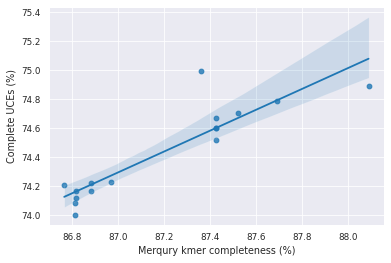

In [122]:
merqury_df = pd.read_csv("/home/cadel/projects/thesis/UNSWThesis/data/completeness/tigersnake/merqury.tsv", delimiter="\t", names=["Genome","?","found", "expected", "completeness"])

merqury_df = pd.merge(assembly_data[assembly_data.Organism == "tigersnake"], merqury_df, how="outer", left_on="Genome", right_on="Genome")
merqury_df = merqury_df[~merqury_df.expected.isna()]
merqury_df.Iteration = merqury_df.Iteration.astype("string")
merqury_df["complete_%"] = merqury_df["exact_hit"] / (merqury_df["hit"] + merqury_df["miss"]) * 100

f, (ax1) = plt.subplots()
# sns.lineplot(data=merqury_df, x="Iteration", y="completeness", ax=ax1)
# twinx = ax1.twinx()
# sns.lineplot(data=merqury_df, x="Iteration", y="hit", ax=twinx, color="orange")

#sns.relplot(data=merqury_df, x="completeness", y="hit")
sns.regplot(ax=ax1, data=merqury_df[(merqury_df.Iteration != "1.0") & (merqury_df.Iteration != "2.0")], x="completeness", y="complete_%")
ax1.set_xlabel("Merqury kmer completeness (%)")
ax1.set_ylabel("Complete UCEs (%)")
f.savefig(os.path.join(constants.image_out_dir, "merqury.pdf"))

no_outliers = merqury_df.copy()[(merqury_df.Iteration != "1.0") & (merqury_df.Iteration != "2.0")]
print(pearsonr(no_outliers["completeness"], no_outliers["exact_hit"]))
print(pearsonr(merqury_df["completeness"], merqury_df["exact_hit"]))
print(len(merqury_df))
merqury_df

In [110]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    n=len(x)
    r, p = pearsonr(x, y)
    ax = ax or plt.gca()
    
    if p < 0.05 and abs(r) >= 0.7 and not x.equals(y):
        #pass
        ax.annotate(f'ρ = {r:.2f}, p = {p:.5f}', xy=(.05, .9), xycoords=ax.transAxes)
        # kws['color'] = 'tomato'
        # plt.scatter(x,y,**kws)

step
index                object
mean_protratio       object
protratio_median     object
protratio_sd         object
duplicity            object
mean_f1_score        object
mean_f1              object
Iteration           float64
dtype: object
step index  mean_protratio  protratio_median  protratio_sd  duplicity  \
0        1         91.9338           99.8066       21.6565    91.8160   
1        2         91.9562           99.8069       21.6359    91.7762   
2        3         93.6762           99.8674       19.2846    91.3638   
3        4         93.7015           99.8720       19.3475    91.4098   
4        5         93.8079           99.8779       19.2076    91.3664   
5        6         93.7305           99.8773       19.2694    91.5717   
6        7         94.0878           99.8924       18.6809    89.7704   
7        8         94.6452           99.9204       17.8068    89.7401   

step  mean_f1_score  mean_f1  Iteration  
0           90.6657  59.8339        1.0  
1           90.

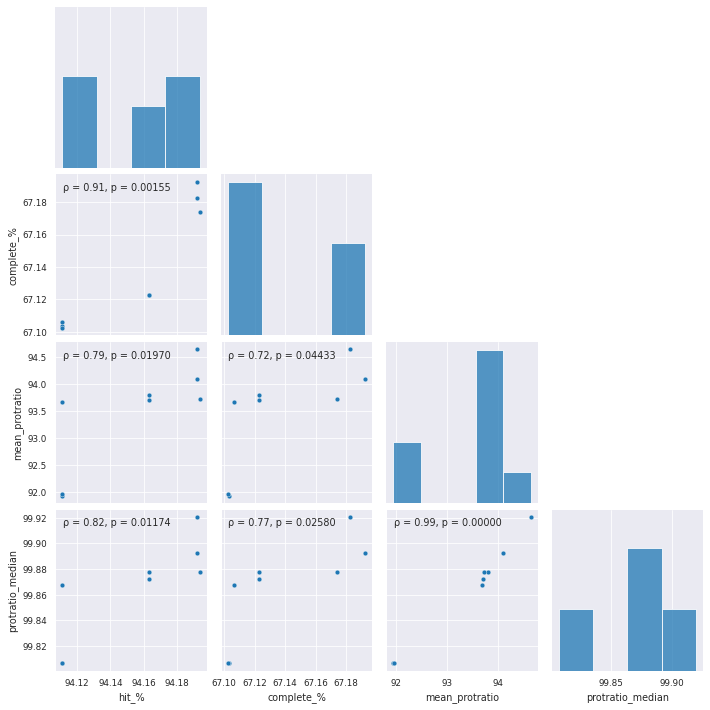

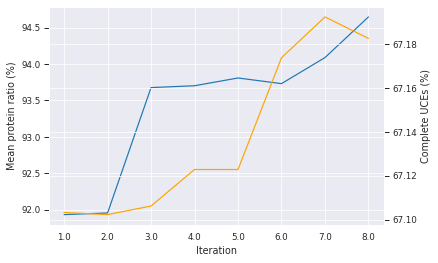

In [119]:
saaga_df = pd.read_csv("/home/cadel/projects/thesis/UNSWThesis/data/completeness/starling/saaga.csv")
saaga_df = saaga_df.transpose()
saaga_df.columns = saaga_df.iloc[0]
saaga_df = saaga_df.drop(saaga_df.index[0]).reset_index()
saaga_df["Iteration"] = saaga_df.index.astype("float") + 1
print(saaga_df.dtypes)
cols = ["mean_protratio", "protratio_median", "protratio_sd", "duplicity", "mean_f1_score", "mean_f1"]
for c in cols:
    saaga_df[c] = saaga_df[c].astype("float") * 100


print(saaga_df)
assembly_data[assembly_data.Organism == "starling"]
saaga_df = pd.merge(assembly_data[assembly_data.Organism == "starling"], saaga_df, how="outer", left_on="Iteration", right_on="Iteration")
saaga_df["homologous"] = saaga_df["hit"] - saaga_df["exact_hit"]
# merqury_df = merqury_df[~merqury_df.expected.isna()]
saaga_df.Iteration = saaga_df.Iteration.astype("string")
saaga_df["complete_%"] = saaga_df["exact_hit"] / (saaga_df["hit"] + saaga_df["miss"]) * 100
saaga_df["hit_%"] = saaga_df["hit"] / (saaga_df["hit"] + saaga_df["miss"]) * 100

smap = sns.pairplot(
    data=saaga_df,
    x_vars=["hit_%", "complete_%","mean_protratio", "protratio_median"],
    y_vars=["hit_%", "complete_%","mean_protratio", "protratio_median"],
    corner=True
)
smap.map(corrfunc)
smap.savefig(os.path.join(constants.image_out_dir, "saaga.pdf"))


f, (ax1) = plt.subplots()
sns.lineplot(data=saaga_df, x="Iteration", y="mean_protratio", ax=ax1)
twinx = ax1.twinx()
sns.lineplot(data=saaga_df, x="Iteration", y="complete_%", ax=twinx, color="orange")
ax1.set_ylabel("Mean protein ratio (%)")
twinx.set_ylabel("Complete UCEs (%)")
f.savefig(os.path.join(constants.image_out_dir, "saaga_exact.pdf"))
# #sns.relplot(data=merqury_df, x="completeness", y="hit")
#sns.regplot(ax=ax1, data=saaga_df, x="mean_protratio", y="exact_hit")
# ax1.set_xlabel("Merqury kmer completeness (%)")
# ax1.set_ylabel("Complete UCEs")
# f.savefig(os.path.join(constants.image_out_dir, "merqury.pdf"))

# no_outliers = merqury_df.copy()[(merqury_df.Iteration != "1.0") & (merqury_df.Iteration != "2.0")]
# print(pearsonr(no_outliers["completeness"], no_outliers["exact_hit"]))
# print(pearsonr(merqury_df["completeness"], merqury_df["exact_hit"]))
# merqury_df


In [120]:
assembly_data[assembly_data.Organism == "starling"]

,Iteration,Organism,Genome,Stage,Tools,alignment,hit,exact_hit,miss,assembly,...,assembly_blocks,n_paths,avg_len,median_len,min_len,max_len,avg_score,median_score,min_score,max_score
0,1.0,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova,step1_svulgaris-10x-550M-sub80.1,95920.0,68393.0,6002.0,step1_svulgaris-10x-550M-sub80.1,...,step1_svulgaris-10x-550M-sub80.1,805.0,20.436025,6.0,1.0,341.0,137.290683,41.0,-3.0,2333.0
1,2.0,starling,step2_svulgaris-10x-550M-sub80.pri,Tidying,Diploidocus,step2_svulgaris-10x-550M-sub80.pri,95920.0,68392.0,6002.0,step2_svulgaris-10x-550M-sub80.pri,...,step2_svulgaris-10x-550M-sub80.pri,807.0,20.376704,6.0,1.0,341.0,136.858736,39.0,-3.0,2333.0
2,3.0,starling,step3_scaffolds,Scaffolding,"SLR, SSPACE",step3_scaffolds,95920.0,68396.0,6002.0,step3_scaffolds,...,step3_scaffolds,329.0,43.775076,9.0,1.0,482.0,291.729483,56.0,-3.0,3291.0
3,4.0,starling,step4_scaffolds_gapfilled_FINAL,Gapfilling,"LR_GapCloser, GapFinisher",step4_scaffolds_gapfilled_FINAL,95973.0,68413.0,5949.0,step4_scaffolds_gapfilled_FINAL,...,step4_scaffolds_gapfilled_FINAL,328.0,43.981707,9.0,2.0,482.0,295.707317,56.0,4.0,3290.0
4,5.0,starling,step5_L_RNA_scaffolder,Scaffolding,L_RNA_Scaffolder,step5_L_RNA_scaffolder,95973.0,68413.0,5949.0,step5_L_RNA_scaffolder,...,step5_L_RNA_scaffolder,320.0,44.762500,8.5,1.0,482.0,300.071875,56.0,-3.0,3292.0
5,6.0,starling,step6_L_RNA_scaffolder.polished,Polishing,L_RNA_Scaffolder,step6_L_RNA_scaffolder.polished,96004.0,68465.0,5918.0,step6_L_RNA_scaffolder.polished,...,step6_L_RNA_scaffolder.polished,324.0,44.438272,8.0,1.0,482.0,297.533951,55.0,-3.0,3291.0
6,7.0,starling,step7_L_RNA_scaffolder.polished.tidy.diploidocus,Tidying,"Purge_Haplotigs, Diploidocus",step7_L_RNA_scaffolder.polished.tidy.diploidocus,96002.0,68484.0,5920.0,step7_L_RNA_scaffolder.polished.tidy.diploidocus,...,step7_L_RNA_scaffolder.polished.tidy.diploidocus,317.0,45.842271,9.0,2.0,482.0,304.558360,58.0,4.0,3291.0
7,8.0,starling,step8_pseudochromosomes,Scaffolding,"Satsuma2, RaGOO",step8_pseudochromosomes,96002.0,68474.0,5920.0,step8_pseudochromosomes,...,step8_pseudochromosomes,34.0,333.029412,223.0,2.0,2018.0,1709.235294,1244.0,14.0,9206.0
